In [1]:
import sys
import os

import numpy as np
# needed for some matrix manipulations
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load

import matplotlib.pyplot as plt
# for plots
import seaborn
#using scipy.stats:
from scipy import stats
# # to get date for saving data
from datetime import date    


# set up seaborn for the plots
seaborn.set()


In [3]:
# change directory to specified path
# FILENAMES TO CHANGE
path = '/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-09-03'
date = '2020-09-03'
param_file = '2020-09-03_BRAIN_ADAPT_True_BRAIN_RATE_0.001_DEC_ADAPT_True_K_RATE_0.001_A_RATE_0.001_Parameters.npz'
NUM_DIM = 2
NUM_NEURONS = 20
os.chdir(path)
os.getcwd()

'/Users/mmadduri/Documents/PhD/ResearchMaterials/Code/BMI_Model/data/2020-09-03'

In [4]:
cost_start_path = '_Trial_cost_start_data.npy'
targ_path = '_Trial_target_data.npy'
cursor_st_path = '_Trial_cursor_start_data.npy'
k_path = '_Decoder_K_data.npy'
lambda_path = '_Brain_lambda_data.npy'

In [5]:
# any paramters file is fine

parameters=np.load(param_file)
NUM_TRIALS = parameters['num_trials']
NUM_SESSIONS = parameters['num_sessions']
DEC_ADAPT = parameters['decoder_adapt']
BRAIN_ADAPT = parameters['brain_adapt']
NUM_B_RATES = parameters['num_b_rate']
B_RATE_LIST = parameters['b_rate_list']
NUM_D_RATES = parameters['num_d_rate']
D_RATE_LIST = parameters['d_rate_list']
NUM_LAMBDA = NUM_DIM + 1

# np.savez(filename + '_Parameters.npz', num_trials=NUM_TRIALS, num_sessions=NUM_SESSIONS, 
#          decoder_adapt=DECODER_ADAPT, brain_adapt=BRAIN_ADAPT, brain_rate=lambda_rate, 
#          k_rate=K_RATE, a_rate=A_RATE, num_b_rate=NUM_B_RATE, num_d_rate=NUM_D_RATE, b_rate_list=rate_list, d_rate_list=dec_rate_list)

print("Number of Trials = " + str(NUM_TRIALS))
print("Number of Sessions = " + str(NUM_SESSIONS))
print("")
print("Number of Brain Rates = " + str(NUM_B_RATES))
print("Brain Rates = " + str(B_RATE_LIST))
print("")
print("Number of Decoder Rates = " + str(NUM_D_RATES))
print("Decoder Rates = " + str(D_RATE_LIST))

Number of Trials = 200
Number of Sessions = 3

Number of Brain Rates = 1
Brain Rates = [0.001]

Number of Decoder Rates = 1
Decoder Rates = [0.001]


In [6]:
path_B = np.empty(NUM_B_RATES, dtype='<U256')
path_D = np.empty(NUM_D_RATES, dtype='<U256')
# rate_B = np.empty(NUM_B_RATES)
# rate_D = np.empty(NUM_D_RATES)

path = np.empty([NUM_B_RATES, NUM_D_RATES], dtype='<U256')
# rates = np.empty([NUM_B_RATES, NUM_D_RATES, 2])

cost_start = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_TRIALS, NUM_SESSIONS])
mean_cost = np.empty([NUM_B_RATES, NUM_D_RATES])
mean_cost_last = np.empty([NUM_B_RATES, NUM_D_RATES])
targ = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS])
cursor_st = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS])
k_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_DIM, NUM_NEURONS, NUM_TRIALS, NUM_SESSIONS])
lambda_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_NEURONS, NUM_LAMBDA, NUM_TRIALS, NUM_SESSIONS])

## From BMIModel_AdaptiveDecoder Code:
# cursor_start = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# cursor_end = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# # Note to self: last NUM_TRIALS element of target_trial is not run
# target_trial = np.zeros( (NUM_DIM, 1, NUM_TRIALS, NUM_SESSIONS) )
# lambda_trial = np.zeros( (NUM_NEURONS, NUM_LAMBDA, NUM_TRIALS, NUM_SESSIONS) )
# fr_trial = np.zeros( (NUM_NEURONS, 1, NUM_TRIALS) )
# a_trial = np.zeros( (NUM_DIM, NUM_TRIALS, NUM_SESSIONS) )
# k_trial = np.zeros( (NUM_DIM, NUM_NEURONS, NUM_TRIALS, NUM_SESSIONS) )
# re_startT = np.zeros( (NUM_TRIALS, NUM_SESSIONS) )
# re_endT = np.zeros( (NUM_TRIALS, NUM_SESSIONS) )

In [7]:
# Need to list out the paths, there's probably a more clever way
# rate list: [3.16227766e-04 1.00000000e-04 3.16227766e-05 1.00000000e-05 3.16227766e-06 1.00000000e-06]


for iB in range(NUM_B_RATES):
    path_B[iB] = '_BRAIN_ADAPT_' + str(BRAIN_ADAPT) + '_BRAIN_RATE_' + str(B_RATE_LIST[iB])
    
for iD in range(NUM_D_RATES):
    path_D[iD] = '_DEC_ADAPT_' + str(DEC_ADAPT) + '_K_RATE_' + str(D_RATE_LIST[iD]) + '_A_RATE_' + str(D_RATE_LIST[iD])

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        path[iB, iD] = '' + date + path_B[iB] + path_D[iD]


In [8]:
lastNum = 5

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        cost_start[iB, iD] = np.load(path[iB, iD] + cost_start_path)
        mean_cost[iB, iD] = np.mean(cost_start[iB, iD])
        mean_cost_last[iB, iD] = np.mean(cost_start[iB, iD, NUM_TRIALS-lastNum-1: NUM_TRIALS-1, :])
        targ[iB, iD, :, :, :, :] = np.load(path[iB, iD] + targ_path)
        cursor_st[iB, iD, :, :, :, :] = np.load(path[iB, iD] + cursor_st_path)
        k_data[iB, iD, :, :, :, :] = np.load(path[iB,iD] + k_path)
        lambda_data[iB, iD, :, :, :, :] = np.load(path[iB, iD] + lambda_path)

In [9]:
print(mean_cost_last)

[[0.4707395]]


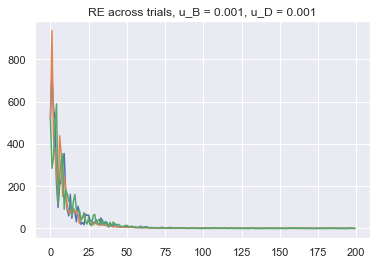

Mean: 27.710279310911197
Last 5 Trials: 0.4707394974497199



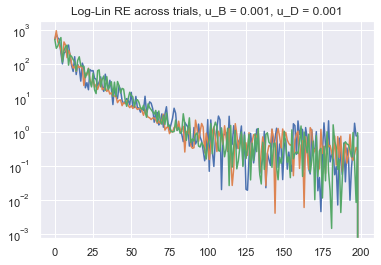

In [10]:
uB_idx = 0
uD_idx = 1

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        plt.plot(cost_start[iB, iD])
        plt.title('RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()
        print("Mean: " + str(mean_cost[iB, iD]))
        print("Last 5 Trials: " + str(mean_cost_last[iB, iD]))
        print("")
        # plots with log scaling on the y-axis -- so this plots x vs log_10(y)
        plt.semilogy(cost_start[iB, iD])
        plt.title('Log-Lin RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()
        


[[0.4707395]]


[Text(30.5, 0.5, 'uB'), Text(0.5, 12.5, 'uD')]

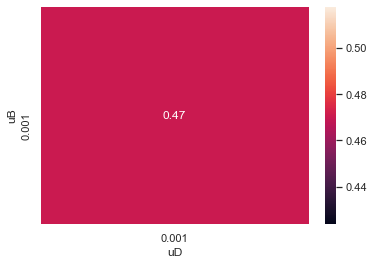

In [11]:
print(mean_cost_last)

ax = seaborn.heatmap(mean_cost_last, annot=True, fmt='.2g', xticklabels=D_RATE_LIST, yticklabels=B_RATE_LIST)
ax.set(xlabel="uD", ylabel = "uB")
# y = uB, x = uD


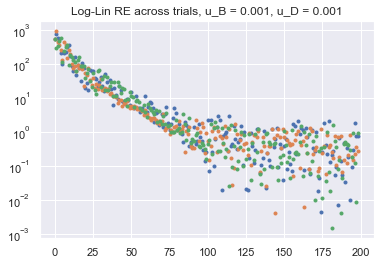

In [12]:
# Same plots as above, but looking at the linear portion of the log curve only
uB_idx = 0
uD_idx = 1

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        plt.semilogy(cost_start[iB, iD, :, :], '.')
        
        plt.title('Log-Lin RE across trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.show()

In [13]:
# from: http://bagrow.info/dsv/LEC10_notes_2014-02-13.html
def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),100)
        
    # Predicted values from fitted model:
    a, b, r, p, err = stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

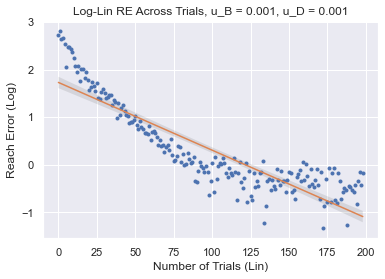

slope = -0.014242111387031138
intercept = 1.728460193059845
r-squared = 0.7854475035853629
p-value = 9.163469854425118e-68
std error = 0.0005303339979294746


In [14]:
x_limit = NUM_TRIALS-1
x_axis = np.arange(0, x_limit , 1)
slope = np.zeros([NUM_B_RATES, NUM_D_RATES])

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        y_plot = np.log10(np.mean(cost_start[iB, iD, 0:x_limit, :], 1))
        plt.plot(x_axis, y_plot, '.')
        slope[iB, iD], intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_plot)
        y_fit = slope[iB, iD]*x_axis + intercept
        plt.plot(x_axis, y_fit)
        ci = 1.96 * std_err
        yl,yu,xd = linregress_CIs(x_axis, y_plot)
        plt.fill_between(xd, yl, yu, alpha=0.2, facecolor='gray',edgecolor='none')
        plt.title('Log-Lin RE Across Trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.xlabel("Number of Trials (Lin)")
        plt.ylabel("Reach Error (Log)")
        plt.show()
#         seaborn.regplot(x_axis, y_plot, 1)
#         plt.show()        
        print("slope = " + str(slope[iB, iD]))
        print("intercept = " + str(intercept))
        print("r-squared = " + str(r_value**2))
        print("p-value = " + str(p_value))
        print("std error = " + str(std_err))
        print("========================================================")


        

In [15]:
for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        print( "u_B = " + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]) + '| Slope = ' + str(slope[iB, iD]) )

u_B = 0.001, u_D = 0.001| Slope = -0.014242111387031138


In [16]:
print(slope)
# print("")
# print(B_RATE_LIST)
# print("")
# print(np.log10(B_RATE_LIST))

# plt.plot(np.log10(B_RATE_LIST[1:10]), slope[1:10], '.')

[[-0.01424211]]


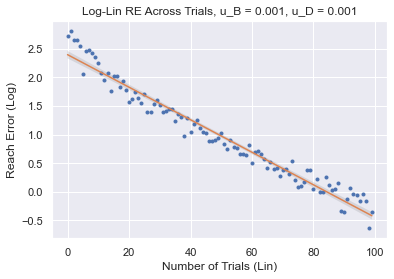

slope = -0.02843659214508039
intercept = 2.397220785377858
r-squared = 0.9618815678412551
p-value = 2.4496433022619416e-71
std error = 0.0005718356468055916


In [21]:
x_limit = 100
x_axis = np.arange(0, x_limit , 1)

for iB in range(NUM_B_RATES):
    for iD in range(NUM_D_RATES):
        y_plot = np.log10(np.mean(cost_start[iB, iD, 0:x_limit, :], 1))
        plt.plot(x_axis, y_plot, '.')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_plot)
        y_fit = slope*x_axis + intercept
        plt.plot(x_axis, y_fit)
        ci = 1.96 * std_err
        yl,yu,xd = linregress_CIs(x_axis, y_plot)
        plt.fill_between(xd, yl, yu, alpha=0.2, facecolor='gray',edgecolor='none')
        plt.title('Log-Lin RE Across Trials, u_B = ' + str(B_RATE_LIST[iB]) + ", u_D = " + str(D_RATE_LIST[iD]))
        plt.xlabel("Number of Trials (Lin)")
        plt.ylabel("Reach Error (Log)")
        plt.show()
#         seaborn.regplot(x_axis, y_plot, 1)
#         plt.show()        
        print("slope = " + str(slope))
        print("intercept = " + str(intercept))
        print("r-squared = " + str(r_value**2))
        print("p-value = " + str(p_value))
        print("std error = " + str(std_err))
        print("========================================================")


In [18]:
# k_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_DIM, NUM_NEURONS, NUM_TRIALS, NUM_SESSIONS])
# lambda_data = np.empty([NUM_B_RATES, NUM_D_RATES, NUM_NEURONS, NUM_LAMBDA, NUM_TRIALS, NUM_SESSIONS])

print(np.shape(k_data))
print(np.shape((lambda_data)))
print(NUM_B_RATES)
print(NUM_D_RATES)


(1, 1, 2, 20, 200, 3)
(1, 1, 20, 3, 200, 3)
1
1
